In [1]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# load the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:06<00:00, 30.1MB/s]
100% 163M/163M [00:06<00:00, 27.0MB/s]


In [3]:
# unzip the file 
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
#import all the necessary libraries
import os # for accessing the files 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # visualize and process the image
import cv2 # open cv
from google.colab.patches import cv2_imshow # per cell e img show korar jnno within this window
from PIL import Image #read images and do some processes on it 
from sklearn.model_selection import train_test_split

In [6]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])

['with_mask_254.jpg', 'with_mask_948.jpg', 'with_mask_723.jpg', 'with_mask_3470.jpg', 'with_mask_475.jpg']
['with_mask_316.jpg', 'with_mask_1193.jpg', 'with_mask_1733.jpg', 'with_mask_422.jpg', 'with_mask_77.jpg']


In [7]:
without_mask_file = os.listdir('//content/data/without_mask')
print(without_mask_file[0:5])
print(without_mask_file[-5:])

['without_mask_3604.jpg', 'without_mask_3712.jpg', 'without_mask_2942.jpg', 'without_mask_3237.jpg', 'without_mask_848.jpg']
['without_mask_2393.jpg', 'without_mask_3516.jpg', 'without_mask_1573.jpg', 'without_mask_2239.jpg', 'without_mask_3094.jpg']


In [8]:
print('Number of with Mask Images :',len(with_mask_file))
print('Number of without Mask Images :',len(without_mask_file))

Number of with Mask Images : 3725
Number of without Mask Images : 3828


Creating level with 2 class of image<br>
1 with mask <br>
0 without mask 

In [9]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828


In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the image 

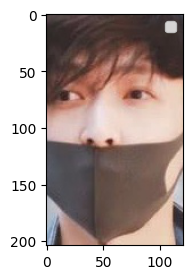

In [13]:
plt.figure(figsize=(3,3))
img = mpimg.imread('/content/data/with_mask/with_mask_1001.jpg')
plt.imshow(img)
plt.legend()
plt.show()

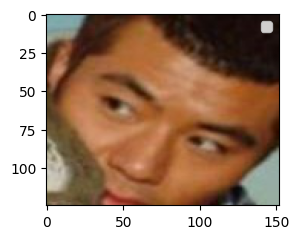

In [14]:
plt.figure(figsize=(3,3))
img = mpimg.imread('/content/data/without_mask/without_mask_1001.jpg')
plt.imshow(img)
plt.legend()
plt.show()

Image processing <br>
resize the image <br>
convert the images into numpy arrays 

In [18]:
# Convert img the image into numpy arrays 


with_mask_path = '/content/data/with_mask/'


data=[]

for image_file in with_mask_file:
  image = Image.open(with_mask_path + image_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for image_file in without_mask_file:
  image = Image.open(without_mask_path + image_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

In [21]:
data[0]

array([[[251, 250, 248],
        [255, 255, 254],
        [255, 255, 253],
        ...,
        [ 90,  95,  99],
        [ 85,  90,  94],
        [ 84,  89,  93]],

       [[156, 155, 153],
        [187, 187, 185],
        [221, 221, 219],
        ...,
        [ 98, 103, 107],
        [ 92,  97, 101],
        [ 98, 103, 107]],

       [[ 46,  46,  44],
        [ 54,  54,  52],
        [ 82,  82,  80],
        ...,
        [104, 109, 113],
        [101, 106, 110],
        [106, 111, 115]],

       ...,

       [[253, 253, 229],
        [253, 253, 230],
        [254, 253, 233],
        ...,
        [252, 236, 208],
        [252, 238, 209],
        [254, 240, 211]],

       [[253, 253, 229],
        [252, 252, 229],
        [254, 253, 231],
        ...,
        [252, 236, 207],
        [252, 238, 209],
        [253, 239, 210]],

       [[253, 253, 229],
        [253, 253, 229],
        [253, 253, 230],
        ...,
        [253, 237, 206],
        [251, 237, 208],
        [252, 238, 209]]

In [22]:
type(data[0])

numpy.ndarray

In [26]:
print("Shape of the image :",data[0].shape)

Shape of the image : (128, 128, 3)


In [27]:
print(type(labels))

<class 'list'>


In [29]:
# convert the image and label into numpy arrays 
x = np.array(data)
y = np.array(labels)
print("type of x independent varible which contain images :",type(x))
print("type of y dependent variable which contain the image label (with mask/without mask)",type(y))

type of x independent varible which contain images : <class 'numpy.ndarray'>
type of y dependent variable which contain the image label (with mask/without mask) <class 'numpy.ndarray'>


In [30]:
x[0]

array([[[251, 250, 248],
        [255, 255, 254],
        [255, 255, 253],
        ...,
        [ 90,  95,  99],
        [ 85,  90,  94],
        [ 84,  89,  93]],

       [[156, 155, 153],
        [187, 187, 185],
        [221, 221, 219],
        ...,
        [ 98, 103, 107],
        [ 92,  97, 101],
        [ 98, 103, 107]],

       [[ 46,  46,  44],
        [ 54,  54,  52],
        [ 82,  82,  80],
        ...,
        [104, 109, 113],
        [101, 106, 110],
        [106, 111, 115]],

       ...,

       [[253, 253, 229],
        [253, 253, 230],
        [254, 253, 233],
        ...,
        [252, 236, 208],
        [252, 238, 209],
        [254, 240, 211]],

       [[253, 253, 229],
        [252, 252, 229],
        [254, 253, 231],
        ...,
        [252, 236, 207],
        [252, 238, 209],
        [253, 239, 210]],

       [[253, 253, 229],
        [253, 253, 229],
        [253, 253, 230],
        ...,
        [253, 237, 206],
        [251, 237, 208],
        [252, 238, 209]]

In [31]:
y[0]

1

In [32]:
print("The shape of x :",x.shape)
print("The shape of y :",y.shape)

The shape of x : (7553, 128, 128, 3)
The shape of y : (7553,)


Now spltting the data for training and tesing 

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [36]:
print("x shape ",x.shape)
print("x_train shape ",x_train.shape)
print("x_test shape ",x_test.shape)

x shape  (7553, 128, 128, 3)
x_train shape  (6042, 128, 128, 3)
x_test shape  (1511, 128, 128, 3)


In [37]:
print("y shape ",y.shape)
print("y_train shape ",y_train.shape)
print("y_test shape ",y_test.shape)

y shape  (7553,)
y_train shape  (6042,)
y_test shape  (1511,)


Scaling the data

In [40]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
print("x_train before scaling ",x_train[0])
print("x_train after scaling ",x_train_scaled[0].round(2))

x_train before scaling  [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
x_train after scaling  [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
 

Building our CNN model 

In [42]:
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [44]:
from keras.engine.sequential import Sequential
model = Sequential()
#1st layer 
model.add(Conv2D(32,kernel_size =(3,3),strides=(1,1),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


#2nd layer
model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#flatten layer 
model.add(Flatten())

#Dense layer 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='sigmoid'))

In [45]:
#compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [46]:
history = model.fit(x_train_scaled,
                    y_train,
                    validation_split=0.1,
                    epochs=10)

Epoch 1/10
170/170 [==============================] - 16s 23ms/step - loss: 0.4234 - accuracy: 0.8273 - val_loss: 0.2959 - val_accuracy: 0.8628
Epoch 2/10
170/170 [==============================] - 3s 17ms/step - loss: 0.3003 - accuracy: 0.8814 - val_loss: 0.2511 - val_accuracy: 0.8926
Epoch 3/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2342 - accuracy: 0.9075 - val_loss: 0.2515 - val_accuracy: 0.9058
Epoch 4/10
170/170 [==============================] - 3s 18ms/step - loss: 0.2025 - accuracy: 0.9182 - val_loss: 0.2225 - val_accuracy: 0.9190
Epoch 5/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1762 - accuracy: 0.9301 - val_loss: 0.2307 - val_accuracy: 0.9190
Epoch 6/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1584 - accuracy: 0.9332 - val_loss: 0.2634 - val_accuracy: 0.9157
Epoch 7/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1347 - accuracy: 0.9478 - val_loss: 0.2402 - val_accuracy: 0.922

model evaluation 

In [48]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print("Loss ",loss)
print("Accuracy",accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.3767 - accuracy: 0.9173
Loss  0.3767162263393402
Accuracy 0.9172733426094055


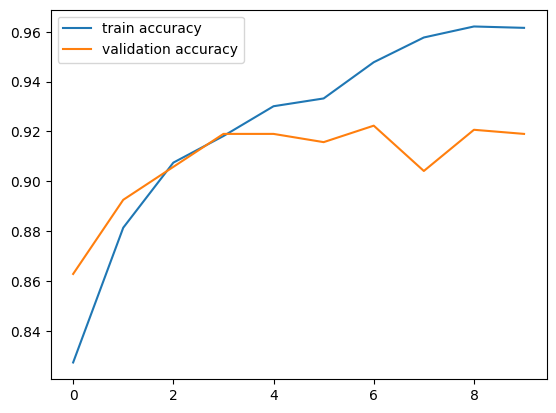

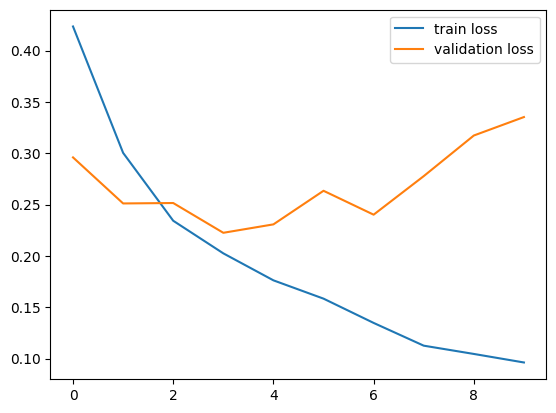

In [52]:
h = history
#plot the accuracy value 
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()

#plot the loss value 
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

Predicted the model

In [66]:
input_image_path = input("Give the image path :")
take_image = cv2.imread(input_image_path)

cv2_imshow(take_image)

take_image_resize = cv2.resize(take_image,(128,128))
take_image_scaled = take_image_resize/255
take_image_reshape = np.reshape(take_image_scaled,[1,128,128,3])
prediction = model.predict(take_image_reshape)


print("Probability of wiring mask or not",prediction)

label_prediction = np.argmax(prediction)
print("label prediction ",label_prediction)

if label_prediction ==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')


Give the image path :/content/data/with_mask/with_mask_100.jpg/content/data/with_mask/with_mask_100.jpg


AttributeError: ignored

In [67]:
model.save('/content/drive/MyDrive/Deep learning Save model/Face mask detection using CNN.h5')